In [1]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
# Import my own elasticity matrix manipulation functions
if module_path not in sys.path:
    sys.path.append('../lib')    
import elastic_functions as ef


In [2]:
import numpy as np
filename='../../fibergen_run/ks_512_sat.out'

Ctext=[]
with open(filename, 'r') as f:
    for line in f:
        if 'Effective stiffness matrix' in line:   
            count=1
            for line in f: # now you are at the lines you want
                if count<=6:
                    Ctext.append(line.split())
                    count+=1            
#print(Ctext)
C = np.array(Ctext,dtype='f4')
print(C)
print(C.shape)


[[ 9.0378e+01  4.2758e+01  4.2075e+01 -8.7057e-02  1.0175e+00 -3.7201e-01]
 [ 4.2758e+01  8.9179e+01  4.1710e+01  5.0762e-01 -2.5696e-01 -8.8776e-02]
 [ 4.2076e+01  4.1709e+01  8.6399e+01  6.5560e-01  1.2445e+00  6.8897e-02]
 [-8.7483e-02  5.0768e-01  6.5536e-01  2.0629e+01  3.5864e-02  3.0554e-01]
 [ 1.0178e+00 -2.5691e-01  1.2447e+00  3.5863e-02  2.1855e+01  2.9340e-01]
 [-3.7217e-01 -8.9323e-02  6.8755e-02  3.0561e-01  2.9376e-01  2.2366e+01]]
(6, 6)


In [23]:
# basalt
import re      

def isoC(c11,c44):
    c12=c11-2*c44
    C = np.array(
    ((c11, c12, c12, 0, 0, 0),
     (c12, c11, c12, 0, 0, 0),
     (c12, c12, c11, 0, 0, 0),
     (0, 0, 0, c44, 0, 0),
     (0, 0, 0, 0, c44, 0),
     (0, 0, 0, 0, 0, c44)))
    return C

#----------------
           
with open(filename, 'r') as f:
    for line in f:
        if '- matrix: linear isotropic lambda=' in line:  
            la = line.split()[4]
            mu = line.split()[5]

lab=float(re.sub("[^0-9.]", "", la))
mub=float(re.sub("[^0-9.]", "", mu))
Kb=lab+2/3*mub

print(lab)
print(mub)
print(Kb)

cb44=mub
cb11=lab+2*mub

Cbasalt = isoC(cb11,cb44)
print(Cbasalt)
rob = 2.7



14.9093
0.001
14.909966666666667
[[1.49113e+01 1.49093e+01 1.49093e+01 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.49093e+01 1.49113e+01 1.49093e+01 0.00000e+00 0.00000e+00 0.00000e+00]
 [1.49093e+01 1.49093e+01 1.49113e+01 0.00000e+00 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 1.00000e-03 0.00000e+00 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e-03 0.00000e+00]
 [0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 0.00000e+00 1.00000e-03]]


In [24]:
# Gabbro
with open(filename, 'r') as f:
    for line in f:
        if '- crystals: linear isotropic lambda=' in line:  
            la = line.split()[4]
            mu = line.split()[5]

lag=float(re.sub("[^0-9.]", "", la))
mug=float(re.sub("[^0-9.]", "", mu))
Kg=lag+2/3*mug

print(lag)
print(mug)
print(Kg)

cg44=mug
cg11=lag+2*mug

Cgabbro = isoC(cg11,cg44)
print(Cgabbro)
rog = 2.84


56.3067
39.86
82.88003333333333
[[136.0267  56.3067  56.3067   0.       0.       0.    ]
 [ 56.3067 136.0267  56.3067   0.       0.       0.    ]
 [ 56.3067  56.3067 136.0267   0.       0.       0.    ]
 [  0.       0.       0.      39.86     0.       0.    ]
 [  0.       0.       0.       0.      39.86     0.    ]
 [  0.       0.       0.       0.       0.      39.86  ]]


In [46]:
ijkl = np.reshape([0,5,4,5,1,3,4,3,2],[3,3])

#matrix volume fraction: 0.1431 interface volume fraction: 0
#crystals volume fraction: 0.8569 interface volume fraction: 0
fb = 0.1431
fg = 1-fg
# density of mixture
roe = fb*rob+fg*rog
print(roe)


[bulkh,shearh,vpxh,vs1xh,vs2xh,vpyh,vs1yh,vs2yh,vpzh,vs1zh,vs2zh] = ef.xyzv(C,roe,ijkl)


2.8199659999999995


In [47]:
print(bulkh,shearh,vpxh,vs1xh,vs2xh,vpyh,vs1yh,vs2yh,vpzh,vs1zh,vs2zh)


59.83017122425899 21.61047194840266 5.623534515962585 2.8162565620726423 2.704687842105505 5.535188650479855 2.7838989346801735 2.704687842105505 5.661212060689726 2.8162565620726423 2.7838989346801735


In [48]:

with open(filename, 'r') as f:
    for line in f:
        if 'K_eff' in line:  
            Keff = float(line.split()[2])
        if 'mu_eff' in line:  
            mueff = float(line.split()[2])
        if 'lambda_eff' in line:  
            laeff = float(line.split()[2])


print(Keff,mueff,laeff)


57.67 22.26 42.83


In [78]:
sys.path.append('../../../ElasticC')
import elasticc as el

# Initialize volume fractions (melt fraction from 0 to 1)
dc = 1e-3
nc = int(1./dc-1)
cb = np.linspace(dc,dc*nc,nc)
cg = 1-cb

# Calculate density of composite as function of melt fraction
roe = el.limits.Voigt(rog,cg,rob,cb)

Gb=mub
Gg=mug


In [79]:
# Reuss bounds
Kr = el.limits.Reuss(Kg,cg,Kb,cb)
Gr = el.limits.Reuss(Kg,cg,Kb,cb)
Vpr = np.sqrt((Kr+4.0/3.0*Gr)/roe)
Vsr = np.sqrt(Gr/roe)

# Voight
Kv = el.limits.Voigt(Kg,cg,Kb,cb)
Gv = el.limits.Voigt(Kg,cg,Kb,cb)
Vpv = np.sqrt((Kv+4.0/3.0*Gv)/roe)
Vsv = np.sqrt(Gv/roe)

# Hashin-Shtrikman
Khs1,Ghs1 = el.limits.hs_bounds(Kg,Kb,Gg,Gb,cg,cb)
Khs2,Ghs2 = el.limits.hs_bounds(Kb,Kg,Gb,Gg,cb,cg)
Vphs1 = np.sqrt((Khs1+4.0/3.0*Ghs1)/roe)
Vshs1 = np.sqrt(Ghs1/roe)
Vphs2 = np.sqrt((Khs2+4.0/3.0*Ghs2)/roe)
Vshs2 = np.sqrt(Ghs2/roe)

../../../ElasticC/elasticc/eep.py:446: RuntimeWarning: overflow encountered in double_scalars
  A=Gi/G-1.0
../../../ElasticC/elasticc/eep.py:447: RuntimeWarning: overflow encountered in double_scalars
  B=(Ki/KK-Gi/G)/3.0
../../../ElasticC/elasticc/eep.py:447: RuntimeWarning: invalid value encountered in double_scalars
  B=(Ki/KK-Gi/G)/3.0
../../../ElasticC/elasticc/eep.py:472: RuntimeWarning: overflow encountered in double_scalars
  A=Gi/G-1.0
../../../ElasticC/elasticc/eep.py:473: RuntimeWarning: overflow encountered in double_scalars
  B=(Ki/KK-Gi/G)/3.0
../../../ElasticC/elasticc/eep.py:473: RuntimeWarning: invalid value encountered in double_scalars
  B=(Ki/KK-Gi/G)/3.0
../../../ElasticC/elasticc/eep.py:446: RuntimeWarning: divide by zero encountered in double_scalars
  A=Gi/G-1.0
../../../ElasticC/elasticc/eep.py:447: RuntimeWarning: divide by zero encountered in double_scalars
  B=(Ki/KK-Gi/G)/3.0
../../../ElasticC/elasticc/eep.py:472: RuntimeWarning: divide by zero encountered 

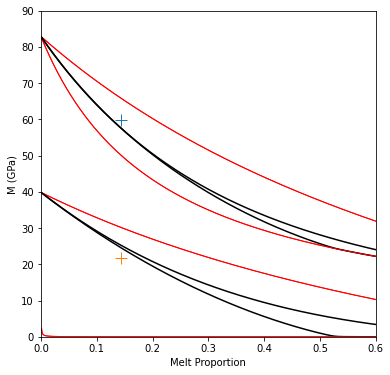

In [82]:
import matplotlib.pyplot as plt


# Aspect ratio of two phases
ab=0.15
ag=1

# SCA
# Unrelaxed, high frequency limit
b_Ku1,b_Gu1 = el.eep.mod_b(Kg,Kb,Gg,Gb,ag,ab,cg,cb)
b_Vpu1=np.sqrt((b_Ku1+4.0/3.0*b_Gu1)/roe)
b_Vsu1=np.sqrt(b_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.mod_b(Kg,0.0,Gg,0.0,ag,ab,cg,cb)
# Then use Gassman's fluid substitution
b_Kr1,b_Gr1 = el.eep.gassman_2(K,G,Kg,Gg,Kb,Gb,cb)
b_Vpr1=np.sqrt((b_Kr1+4.0/3.0*b_Gr1)/roe)
b_Vsr1=np.sqrt(b_Gr1/roe)

pmin=0.0
pmax=0.6
fig = plt.figure(figsize=(6,6))
plt.xlabel('Melt Proportion')
plt.ylabel('M (GPa)')
plt.xlim(pmin,pmax)
plt.ylim(0,90)
plt.plot(cb,Khs1,lw='1',c='r')
plt.plot(cb,Khs2,lw='1',c='r')
plt.plot(cb,Ghs1,lw='1',c='r')
plt.plot(cb,Ghs2,lw='1',c='r')
# Plot unrelaxed bulk modulus
plt.plot(cb,b_Ku1,c='black',linewidth=1.5)
# Plot relaxed bulk modulus - dashed
#plt.plot(cb,b_Kr1,c='black',linestyle='--',linewidth=1.5)
# Plot unrelaxed shear modulus
plt.plot(cb,b_Gu1,c='black',linewidth=1.5)
# Plot relaxed shear modulus - dashed
#plt.plot(cb,b_Gr1,c='black',linestyle='--',linewidth=1.5)

# DEM
# Aspect ratio of two phases
# Unrelaxed, high frequency limit
a_Ku1,a_Gu1 = el.eep.dem(Kg,Kb,Gg,Gb,ab,cb)
a_Vpu1=np.sqrt((a_Ku1+4.0/3.0*a_Gu1)/roe)
a_Vsu1=np.sqrt(a_Gu1/roe)
# Relaxed, low frequency limit
# Calculate dry moduli first (void fill)
K,G = el.eep.dem(Kg,0.0,Gg,0.0,ab,cb)
# Then use Gassman's fluid substitution
a_Kr1,a_Gr1 = el.eep.gassman_2(K,G,Kg,Gg,Kb,Gb,cb)
a_Vpr1=np.sqrt((a_Kr1+4.0/3.0*a_Gr1)/roe)
a_Vsr1=np.sqrt(a_Gr1/roe)

plt.plot(cb,Khs1,lw='1',c='r')
plt.plot(cb,Khs2,lw='1',c='r')
plt.plot(cb,Ghs1,lw='1',c='r')
plt.plot(cb,Ghs2,lw='1',c='r')
plt.plot(cb,a_Ku1,c='black',linewidth=1.5)
#plt.plot(cb,a_Kr1,c='black',linestyle='--',linewidth=1.5)
plt.plot(cb,a_Gu1,c='black',linewidth=1.5)
#plt.plot(cb,a_Gr1,c='black',linestyle='--',linewidth=1.5)



plt.plot(fb,bulkh,marker='+',markersize=12,lw=2)
plt.plot(fb,shearh,marker='+',markersize=12,lw=2)

plt.show()

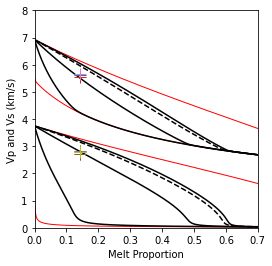

In [87]:
# Aspect ratio of two phases
ab=0.01
ag=2
b_Ku1,b_Gu1 = el.eep.mod_b(Kg,Kb,Gg,Gb,ag,ab,cg,cb)
b_Vpu1=np.sqrt((b_Ku1+4.0/3.0*b_Gu1)/roe)
b_Vsu1=np.sqrt(b_Gu1/roe)

ab=0.1
ag=2
b_Ku1,b_Gu1 = el.eep.mod_b(Kg,Kb,Gg,Gb,ag,ab,cg,cb)
b_Vpu2=np.sqrt((b_Ku1+4.0/3.0*b_Gu1)/roe)
b_Vsu2=np.sqrt(b_Gu1/roe)

ab=1
ag=2
b_Ku1,b_Gu1 = el.eep.mod_b(Kg,Kb,Gg,Gb,ag,ab,cg,cb)
b_Vpu3=np.sqrt((b_Ku1+4.0/3.0*b_Gu1)/roe)
b_Vsu3=np.sqrt(b_Gu1/roe)

ab=10
ag=2
b_Ku1,b_Gu1 = el.eep.mod_b(Kg,Kb,Gg,Gb,ag,ab,cg,cb)
b_Vpu4=np.sqrt((b_Ku1+4.0/3.0*b_Gu1)/roe)
b_Vsu4=np.sqrt(b_Gu1/roe)

pmin=0.0
pmax=0.7

fig = plt.figure(figsize=(4,4))
plt.xlabel('Melt Proportion')
plt.ylabel('Vp and Vs (km/s)')
plt.xlim(pmin,pmax)
plt.ylim(0,8)
plt.plot(cb,Vphs1,lw='1',c='r')
plt.plot(cb,Vphs2,lw='1',c='r')
plt.plot(cb,Vshs1,lw='1',c='r')
plt.plot(cb,Vshs2,lw='1',c='r')

plt.plot(cb,b_Vpu1,c='black',linewidth=1.5)
plt.plot(cb,b_Vsu1,c='black',linewidth=1.5)
plt.plot(cb,b_Vpu2,c='black',linewidth=1.5)
plt.plot(cb,b_Vsu2,c='black',linewidth=1.5)
plt.plot(cb,b_Vpu3,c='black',linewidth=1.5)
plt.plot(cb,b_Vsu3,c='black',linewidth=1.5)
plt.plot(cb,b_Vpu4,c='black',linewidth=1.5,linestyle='--')
plt.plot(cb,b_Vsu4,c='black',linewidth=1.5,linestyle='--')


for v in [vpxh,vs1xh,vs2xh,vpyh,vs1yh,vs2yh,vpzh,vs1zh,vs2zh]:
 plt.plot(fb,v,marker='+',markersize=12,lw=2)

plt.savefig('vpvs.pdf')